In [797]:
import torch
import matplotlib.pyplot as plt
import numpy as np


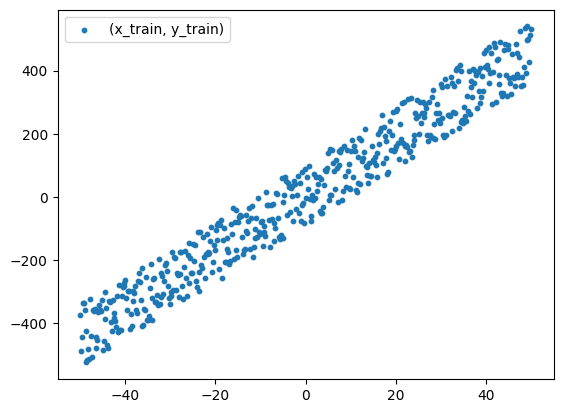

In [798]:
m = 500                      # Size of training set.
epochs = 5                   # Number of training epoch. 
batch_sizes = 20             # Number of training elements in one batch.
iterations = int(m/batch_sizes)
lr = 0.001                   # Learning rage.
assert m % batch_sizes == 0  #Raising an AssertionError when m is not divisible by batch_sizes.

x1, x2, x3 = np.linspace(-50, 50, m).reshape((batch_sizes, iterations)), np.linspace(-50, 50, m).reshape((batch_sizes, iterations)), np.linspace(-50, 50, m).reshape((batch_sizes, iterations))
y = 10 + 5 * x1 - 6*x2 + 10 * x3 + np.random.rand(batch_sizes, iterations) * 200 - 100
x = np.linspace(-50, 50, m)
plt.scatter(x, y, s=10)
plt.legend(["(x_train, y_train)"])

In [799]:
x1_t, x2_t, x3_t = np.linspace(-50.5, 50.5, m), np.linspace(-50.5, 50.5, m), np.linspace(-50.5, 50.5, m)

=============== Training epoch 0===============
=============== Training epoch 1===============
=============== Training epoch 2===============
=============== Training epoch 3===============
=============== Training epoch 4===============


<function matplotlib.pyplot.show(close=None, block=None)>

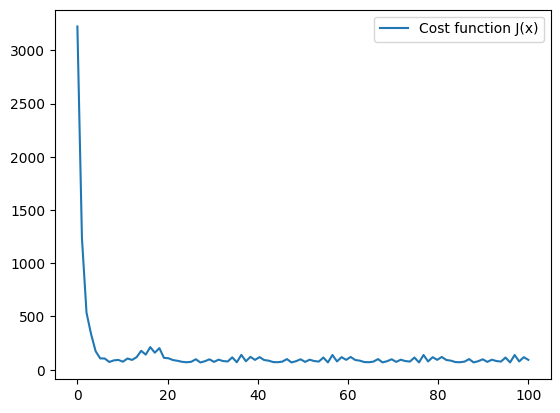

In [800]:
a0, a1, a2, a3 = np.random.rand(4)
d0, d1, d2, d3 = [0,0,0,0]
H = a0 + a1 * x1 + a2 * x2 + a3 * x3
J = 0
J_out = np.array([])

for epoch in range(0, epochs):
    print("=============== Training epoch " + str(epoch) + "===============")
    for batch_size in range(0, batch_sizes):
        J = 0
        d0, d1, d2, d3 = [0, 0, 0, 0]
        H = a0 + a1 * x1 + a2 * x2 + a3 * x3
        for iteration in range(0, iterations):
            
            J = J + (1/(2 * m)) * ((H[batch_size][iteration] - y[batch_size][iteration]) ** 2)
            d0 = d0 + (1 / m) * (H[batch_size][iteration] - y[batch_size][iteration])
            d1 = d1 + (1 / m) * ((H[batch_size][iteration] - y[batch_size][iteration]) * x1[batch_size][iteration])
            d2 = d2 + (1 / m) * ((H[batch_size][iteration] - y[batch_size][iteration]) * x2[batch_size][iteration])
            d3 = d3 + (1 / m) * ((H[batch_size][iteration] - y[batch_size][iteration]) * x3[batch_size][iteration])
        
        a0 = a0 - lr * d0
        a1 = a1 - lr * d1
        a2 = a2 - lr * d2
        a3 = a3 - lr * d3
        
        J_out = np.append(J_out, J) 

plt.figure
plt.plot(np.linspace(0, epochs*batch_sizes, epochs*batch_sizes), J_out)
plt.legend(["Cost function J(x)"])
plt.show
        

        

<function matplotlib.pyplot.show(close=None, block=None)>

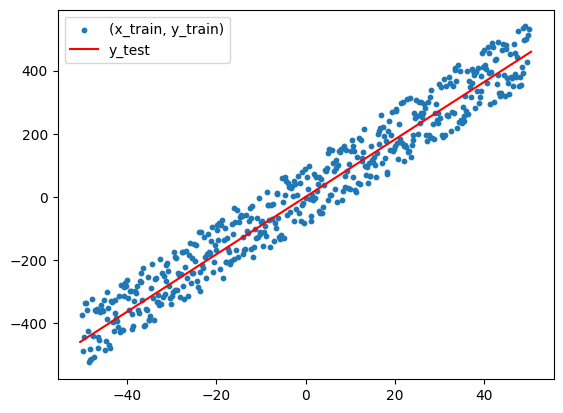

In [801]:
y_hat = a0 + a1 * x1_t + a2 * x2_t + a3 * x3_t
x_t = np.linspace(-50.5, 50.5, m)
plt.figure
plt.scatter(x, y, s=10)
plt.plot(x_t, y_hat, c="r")
plt.legend(["(x_train, y_train)","y_test"])
plt.show